In [21]:
from Simulator import Method, Simulator, ALL_GEARS

import matplotlib.pyplot as plt
import seaborn as sns

## Rules of the game
 1. We simulate a workflow with 3 methods
 2. Method #1 runs faster in OpenCL implementations
 3. Method #2 runs faster in Threaded implementations
 4. Method #3 runs the same speed wherever
 5. Each method has 9 implementations and each implementation takes a different time to run
 6. We know a priori the REAL time distributions for each implementation and they are all Normal
 7. The chance that an implementation is chosen is based upon the squared inverse of the past average values that were seen
 8. Exponential weighting gives more importance to EARLIER benchmarks when calculating the past average value

#### Case study #0 : Initialization of the agent / engine
In this case we have minimal information.
We only have information of one benchmark (aka all implementations were run once)

We run the workflow 1000 times to calculate what is the average run time of the entire workflow

In [22]:
avg_1 = dict(zip(ALL_GEARS,[1,1.5,3,3,3,3,3,4,10]))
std_1 = dict(zip(ALL_GEARS,[0.1,0.15,0.3,0.3,0.3,0.3,0.3,0.4,1]))
met_1 = Method('1',avg_1,std_1, exp=True)

avg_2 = dict(zip(ALL_GEARS,[2,2,1,1,1,1,1,3,10]))
std_2 = dict(zip(ALL_GEARS,[.2,.2,.1,.1,.1,.1,.1,.3,1]))
met_2 = Method('2',avg_2,std_2, exp=True)

avg_3 = dict(zip(ALL_GEARS,[3,3,3,3,3,3,3,3,3]))
std_3 = dict(zip(ALL_GEARS,[0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3]))
met_3 = Method('3',avg_3,std_3, exp=True)

sim = Simulator(met_1,met_2,met_3)
sim.benchmark_all_methods(2)
print("AFTER ONE BENCHMARK")
sim.print_methods()

print("AFTER SIMULATING")
sim.run_simulations_agent(iter_n=200)
sim.print_methods()
sim.print_stats()

normal_liquid = sim

AFTER ONE BENCHMARK
['1', '2', '3'] 
OPENCL_1 |0.1111| |0.1111| |0.1111| 
OPENCL_2 |0.1111| |0.1111| |0.1111| 
CYTHON_THREADED |0.1111| |0.1111| |0.1111| 
CYTHON_THREADED_DYNAMIC |0.1111| |0.1111| |0.1111| 
CYTHON_THREADED_GUIDED |0.1111| |0.1111| |0.1111| 
CYTHON_THREADED_STATIC |0.1111| |0.1111| |0.1111| 
CYTHON_UNTHREADED |0.1111| |0.1111| |0.1111| 
NUMBA |0.1111| |0.1111| |0.1111| 
PYTHON |0.1111| |0.1111| |0.1111| 

AFTER SIMULATING
['1', '2', '3'] 
OPENCL_1 |0.1111| |0.1111| |0.1111| 
OPENCL_2 |0.1111| |0.1111| |0.1111| 
CYTHON_THREADED |0.1111| |0.1111| |0.1111| 
CYTHON_THREADED_DYNAMIC |0.1111| |0.1111| |0.1111| 
CYTHON_THREADED_GUIDED |0.1111| |0.1111| |0.1111| 
CYTHON_THREADED_STATIC |0.1111| |0.1111| |0.1111| 
CYTHON_UNTHREADED |0.1111| |0.1111| |0.1111| 
NUMBA |0.1111| |0.1111| |0.1111| 
PYTHON |0.1111| |0.1111| |0.1111| 

Ran the entire workflow a total of 200 times
The average time to run all methods was 5.38 std_dev 0.96
Method 1 used OPENCL_1 the most (86.0%)
Method 2 u

#### Case study #1 : Initialization of the engine with an EARLY and VERY BRIEF anomaly on ONE device (GPU) 

We start with information of one benchmark (aka all implementations were run once)

We run the workflow 100 times. 

During 10-20 runs there is an anomaly with one GPU which affects all opencl implementation that use that GPU

In [23]:
avg_1 = dict(zip(ALL_GEARS,[1,1.5,3,3,3,3,3,4,10]))
std_1 = dict(zip(ALL_GEARS,[0.1,0.15,0.3,0.3,0.3,0.3,0.3,0.4,1]))
met_1 = Method('1',avg_1,std_1, exp=True)

avg_2 = dict(zip(ALL_GEARS,[2,2,1,1,1,1,1,3,10]))
std_2 = dict(zip(ALL_GEARS,[.2,.2,.1,.1,.1,.1,.1,.3,1]))
met_2 = Method('2',avg_2,std_2, exp=True)

avg_3 = dict(zip(ALL_GEARS,[3,3,3,3,3,3,3,3,3]))
std_3 = dict(zip(ALL_GEARS,[0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3]))
met_3 = Method('3',avg_3,std_3, exp=True)

sim = Simulator(met_1,met_2,met_3)
sim.benchmark_all_methods(2)
sim.print_methods()

sim.run_anomalous_simulations_agent(iter_n=200, ano_start=20, ano_end=40, affected_gear=ALL_GEARS[0], new_avg=4, new_std=0.4)
sim.print_methods()
sim.print_stats()

['1', '2', '3'] 
OPENCL_1 |0.1111| |0.1111| |0.1111| 
OPENCL_2 |0.1111| |0.1111| |0.1111| 
CYTHON_THREADED |0.1111| |0.1111| |0.1111| 
CYTHON_THREADED_DYNAMIC |0.1111| |0.1111| |0.1111| 
CYTHON_THREADED_GUIDED |0.1111| |0.1111| |0.1111| 
CYTHON_THREADED_STATIC |0.1111| |0.1111| |0.1111| 
CYTHON_UNTHREADED |0.1111| |0.1111| |0.1111| 
NUMBA |0.1111| |0.1111| |0.1111| 
PYTHON |0.1111| |0.1111| |0.1111| 

['1', '2', '3'] 
OPENCL_1 |0.1111| |0.1111| |0.1111| 
OPENCL_2 |0.1111| |0.1111| |0.1111| 
CYTHON_THREADED |0.1111| |0.1111| |0.1111| 
CYTHON_THREADED_DYNAMIC |0.1111| |0.1111| |0.1111| 
CYTHON_THREADED_GUIDED |0.1111| |0.1111| |0.1111| 
CYTHON_THREADED_STATIC |0.1111| |0.1111| |0.1111| 
CYTHON_UNTHREADED |0.1111| |0.1111| |0.1111| 
NUMBA |0.1111| |0.1111| |0.1111| 
PYTHON |0.1111| |0.1111| |0.1111| 

Ran the entire workflow a total of 200 times
The average time to run all methods was 5.95 std_dev 0.87
Method 1 used OPENCL_2 the most (58.0%)
Method 2 used CYTHON_THREADED_DYNAMIC the most 

#### Case study #2 : Initialization of the agent / engine with an LATE and VERY BRIEF anomaly on one device (GPU) 
We start with information of one benchmark (aka all implementations were run once)

We run the workflow 100 times. 

During 30-40 runs there is an anomaly with one GPU which affects all opencl implementation that use that GPU

WITH NORMAL AVERAGE

In [24]:
avg_1 = dict(zip(ALL_GEARS,[1,1.5,3,3,3,3,3,4,10]))
std_1 = dict(zip(ALL_GEARS,[0.1,0.15,0.3,0.3,0.3,0.3,0.3,0.4,1]))
met_1 = Method('1',avg_1,std_1, exp=True)

avg_2 = dict(zip(ALL_GEARS,[2,2,1,1,1,1,1,3,10]))
std_2 = dict(zip(ALL_GEARS,[.2,.2,.1,.1,.1,.1,.1,.3,1]))
met_2 = Method('2',avg_2,std_2, exp=True)

avg_3 = dict(zip(ALL_GEARS,[3,3,3,3,3,3,3,3,3]))
std_3 = dict(zip(ALL_GEARS,[0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3]))
met_3 = Method('3',avg_3,std_3, exp=True)

sim = Simulator(met_1,met_2,met_3)
sim.benchmark_all_methods(2)
sim.print_methods()

sim.run_anomalous_simulations_agent(iter_n=200, ano_start=60, ano_end=80, affected_gear=ALL_GEARS[0], new_avg=4, new_std=0.4)
sim.print_methods()
sim.print_stats()

['1', '2', '3'] 
OPENCL_1 |0.1111| |0.1111| |0.1111| 
OPENCL_2 |0.1111| |0.1111| |0.1111| 
CYTHON_THREADED |0.1111| |0.1111| |0.1111| 
CYTHON_THREADED_DYNAMIC |0.1111| |0.1111| |0.1111| 
CYTHON_THREADED_GUIDED |0.1111| |0.1111| |0.1111| 
CYTHON_THREADED_STATIC |0.1111| |0.1111| |0.1111| 
CYTHON_UNTHREADED |0.1111| |0.1111| |0.1111| 
NUMBA |0.1111| |0.1111| |0.1111| 
PYTHON |0.1111| |0.1111| |0.1111| 

['1', '2', '3'] 
OPENCL_1 |0.1111| |0.1111| |0.1111| 
OPENCL_2 |0.1111| |0.1111| |0.1111| 
CYTHON_THREADED |0.1111| |0.1111| |0.1111| 
CYTHON_THREADED_DYNAMIC |0.1111| |0.1111| |0.1111| 
CYTHON_THREADED_GUIDED |0.1111| |0.1111| |0.1111| 
CYTHON_THREADED_STATIC |0.1111| |0.1111| |0.1111| 
CYTHON_UNTHREADED |0.1111| |0.1111| |0.1111| 
NUMBA |0.1111| |0.1111| |0.1111| 
PYTHON |0.1111| |0.1111| |0.1111| 

Ran the entire workflow a total of 200 times
The average time to run all methods was 6.57 std_dev 1.31
Method 1 used CYTHON_THREADED_STATIC the most (35.5%)
Method 2 used CYTHON_UNTHREADED t

#### Case study #3 : Initialization of the agent / engine with an EARLY and LONG anomaly on one device (GPU)

We start with information of one benchmark (aka all implementations were run once)

We run the workflow 100 times. 

During 10-60 runs there is an anomaly with one GPU which affects all opencl implementation that use that GPU

WITH NORMAL AVERAGE

In [25]:
avg_1 = dict(zip(ALL_GEARS,[1,1.5,3,3,3,3,3,4,10]))
std_1 = dict(zip(ALL_GEARS,[0.1,0.15,0.3,0.3,0.3,0.3,0.3,0.4,1]))
met_1 = Method('1',avg_1,std_1, exp=True)

avg_2 = dict(zip(ALL_GEARS,[2,2,1,1,1,1,1,3,10]))
std_2 = dict(zip(ALL_GEARS,[.2,.2,.1,.1,.1,.1,.1,.3,1]))
met_2 = Method('2',avg_2,std_2, exp=True)

avg_3 = dict(zip(ALL_GEARS,[3,3,3,3,3,3,3,3,3]))
std_3 = dict(zip(ALL_GEARS,[0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3]))
met_3 = Method('3',avg_3,std_3, exp=True)

sim = Simulator(met_1,met_2,met_3)
sim.benchmark_all_methods(2)
sim.print_methods()

sim.run_anomalous_simulations_agent(iter_n=200, ano_start=20, ano_end=120, affected_gear=ALL_GEARS[0], new_avg=4, new_std=0.4)
sim.print_methods()
sim.print_stats()

['1', '2', '3'] 
OPENCL_1 |0.1111| |0.1111| |0.1111| 
OPENCL_2 |0.1111| |0.1111| |0.1111| 
CYTHON_THREADED |0.1111| |0.1111| |0.1111| 
CYTHON_THREADED_DYNAMIC |0.1111| |0.1111| |0.1111| 
CYTHON_THREADED_GUIDED |0.1111| |0.1111| |0.1111| 
CYTHON_THREADED_STATIC |0.1111| |0.1111| |0.1111| 
CYTHON_UNTHREADED |0.1111| |0.1111| |0.1111| 
NUMBA |0.1111| |0.1111| |0.1111| 
PYTHON |0.1111| |0.1111| |0.1111| 

['1', '2', '3'] 
OPENCL_1 |0.1111| |0.1111| |0.1111| 
OPENCL_2 |0.1111| |0.1111| |0.1111| 
CYTHON_THREADED |0.1111| |0.1111| |0.1111| 
CYTHON_THREADED_DYNAMIC |0.1111| |0.1111| |0.1111| 
CYTHON_THREADED_GUIDED |0.1111| |0.1111| |0.1111| 
CYTHON_THREADED_STATIC |0.1111| |0.1111| |0.1111| 
CYTHON_UNTHREADED |0.1111| |0.1111| |0.1111| 
NUMBA |0.1111| |0.1111| |0.1111| 
PYTHON |0.1111| |0.1111| |0.1111| 

Ran the entire workflow a total of 200 times
The average time to run all methods was 7.36 std_dev 1.19
Method 1 used CYTHON_UNTHREADED the most (37.5%)
Method 2 used CYTHON_THREADED_DYNAMIC 

#### Case study #4 : Initialization of the agent / engine with a LATE and LONG anomaly on one device (GPU)
We start with information of one benchmark (aka all implementations were run once)

We run the workflow 100 times. 

During 30-80 runs there is an anomaly with one GPU which affects all opencl implementation that use that GPU

WITH NORMAL AVERAGE

In [26]:
avg_1 = dict(zip(ALL_GEARS,[1,1.5,3,3,3,3,3,4,10]))
std_1 = dict(zip(ALL_GEARS,[0.1,0.15,0.3,0.3,0.3,0.3,0.3,0.4,1]))
met_1 = Method('1',avg_1,std_1, exp=True)

avg_2 = dict(zip(ALL_GEARS,[2,2,1,1,1,1,1,3,10]))
std_2 = dict(zip(ALL_GEARS,[.2,.2,.1,.1,.1,.1,.1,.3,1]))
met_2 = Method('2',avg_2,std_2, exp=True)

avg_3 = dict(zip(ALL_GEARS,[3,3,3,3,3,3,3,3,3]))
std_3 = dict(zip(ALL_GEARS,[0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3]))
met_3 = Method('3',avg_3,std_3, exp=True)

sim = Simulator(met_1,met_2,met_3)
sim.benchmark_all_methods(2)
sim.print_methods()

sim.run_anomalous_simulations_agent(iter_n=200, ano_start=60, ano_end=160, affected_gear=ALL_GEARS[0], new_avg=4, new_std=0.4)
sim.print_methods()
sim.print_stats()

liquid_anomaly = sim

['1', '2', '3'] 
OPENCL_1 |0.1111| |0.1111| |0.1111| 
OPENCL_2 |0.1111| |0.1111| |0.1111| 
CYTHON_THREADED |0.1111| |0.1111| |0.1111| 
CYTHON_THREADED_DYNAMIC |0.1111| |0.1111| |0.1111| 
CYTHON_THREADED_GUIDED |0.1111| |0.1111| |0.1111| 
CYTHON_THREADED_STATIC |0.1111| |0.1111| |0.1111| 
CYTHON_UNTHREADED |0.1111| |0.1111| |0.1111| 
NUMBA |0.1111| |0.1111| |0.1111| 
PYTHON |0.1111| |0.1111| |0.1111| 

['1', '2', '3'] 
OPENCL_1 |0.1111| |0.1111| |0.1111| 
OPENCL_2 |0.1111| |0.1111| |0.1111| 
CYTHON_THREADED |0.1111| |0.1111| |0.1111| 
CYTHON_THREADED_DYNAMIC |0.1111| |0.1111| |0.1111| 
CYTHON_THREADED_GUIDED |0.1111| |0.1111| |0.1111| 
CYTHON_THREADED_STATIC |0.1111| |0.1111| |0.1111| 
CYTHON_UNTHREADED |0.1111| |0.1111| |0.1111| 
NUMBA |0.1111| |0.1111| |0.1111| 
PYTHON |0.1111| |0.1111| |0.1111| 

Ran the entire workflow a total of 200 times
The average time to run all methods was 7.23 std_dev 0.74
Method 1 used CYTHON_THREADED the most (42.5%)
Method 2 used CYTHON_THREADED_DYNAMIC th

#### Case study #5 : Initialization of the agent / engine with a PERMANENT anomaly on one device (GPU)
We start with information of one benchmark (aka all implementations were run once)

We run the workflow 100 times. 

During 10-inf runs there is an anomaly with one GPU which affects all opencl implementation that use that GPU

In [27]:
avg_1 = dict(zip(ALL_GEARS,[1,1.5,3,3,3,3,3,4,10]))
std_1 = dict(zip(ALL_GEARS,[0.1,0.15,0.3,0.3,0.3,0.3,0.3,0.4,1]))
met_1 = Method('1',avg_1,std_1, exp=True)

avg_2 = dict(zip(ALL_GEARS,[2,2,1,1,1,1,1,3,10]))
std_2 = dict(zip(ALL_GEARS,[.2,.2,.1,.1,.1,.1,.1,.3,1]))
met_2 = Method('2',avg_2,std_2, exp=True)

avg_3 = dict(zip(ALL_GEARS,[3,3,3,3,3,3,3,3,3]))
std_3 = dict(zip(ALL_GEARS,[0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3]))
met_3 = Method('3',avg_3,std_3, exp=True)

sim = Simulator(met_1,met_2,met_3)
sim.benchmark_all_methods(2)
sim.print_methods()

sim.run_anomalous_simulations_agent(iter_n=200, ano_start=0, ano_end=201, affected_gear=ALL_GEARS[0], new_avg=4, new_std=0.4)
sim.print_methods()
sim.print_stats()

liquid_perm = sim

['1', '2', '3'] 
OPENCL_1 |0.1111| |0.1111| |0.1111| 
OPENCL_2 |0.1111| |0.1111| |0.1111| 
CYTHON_THREADED |0.1111| |0.1111| |0.1111| 
CYTHON_THREADED_DYNAMIC |0.1111| |0.1111| |0.1111| 
CYTHON_THREADED_GUIDED |0.1111| |0.1111| |0.1111| 
CYTHON_THREADED_STATIC |0.1111| |0.1111| |0.1111| 
CYTHON_UNTHREADED |0.1111| |0.1111| |0.1111| 
NUMBA |0.1111| |0.1111| |0.1111| 
PYTHON |0.1111| |0.1111| |0.1111| 

['1', '2', '3'] 
OPENCL_1 |0.1111| |0.1111| |0.1111| 
OPENCL_2 |0.1111| |0.1111| |0.1111| 
CYTHON_THREADED |0.1111| |0.1111| |0.1111| 
CYTHON_THREADED_DYNAMIC |0.1111| |0.1111| |0.1111| 
CYTHON_THREADED_GUIDED |0.1111| |0.1111| |0.1111| 
CYTHON_THREADED_STATIC |0.1111| |0.1111| |0.1111| 
CYTHON_UNTHREADED |0.1111| |0.1111| |0.1111| 
NUMBA |0.1111| |0.1111| |0.1111| 
PYTHON |0.1111| |0.1111| |0.1111| 

Ran the entire workflow a total of 200 times
The average time to run all methods was 7.38 std_dev 1.46
Method 1 used CYTHON_UNTHREADED the most (44.5%)
Method 2 used CYTHON_THREADED_GUIDED t

#### Case study #-1 : No liquid engine! 
We start with information of one benchmark (aka all implementations were run once)
We run the workflow 100 times. 

##### No anomaly

##### Early short:
During 10-20 runs there is an anomaly with one GPU which affects all opencl implementation that use that GPU

##### Late long:
During 30-40 runs there is an anomaly with one GPU which affects all opencl implementation that use that GPU

##### Early long:
During 10-60 runs there is an anomaly with one GPU which affects all opencl implementation that use that GPU

##### Late short:
During 30-80 runs there is an anomaly with one GPU which affects all opencl implementation that use that GPU

##### Permanent
During 10-inf runs there is an anomaly with one GPU which affects all opencl implementation that use that GPU

In [28]:
avg_1 = dict(zip(ALL_GEARS,[1,1.5,3,3,3,3,3,4,10]))
std_1 = dict(zip(ALL_GEARS,[0.1,0.15,0.3,0.3,0.3,0.3,0.3,0.4,1]))
met_1 = Method('1',avg_1,std_1, exp=True)

avg_2 = dict(zip(ALL_GEARS,[2,2,1,1,1,1,1,3,10]))
std_2 = dict(zip(ALL_GEARS,[.2,.2,.1,.1,.1,.1,.1,.3,1]))
met_2 = Method('2',avg_2,std_2, exp=True)

avg_3 = dict(zip(ALL_GEARS,[3,3,3,3,3,3,3,3,3]))
std_3 = dict(zip(ALL_GEARS,[0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3]))
met_3 = Method('3',avg_3,std_3, exp=True)

sim = Simulator(met_1,met_2,met_3)
sim.benchmark_all_methods(1)
print("AFTER ONE BENCHMARK")
sim.print_methods()

print("AFTER SIMULATING")
sim.run_simulations(iter_n=200, solid=True)
sim.print_methods()
sim.print_stats()

normal_solid = sim

AFTER ONE BENCHMARK
['1', '2', '3'] 
OPENCL_1 |0.1111| |0.1111| |0.1111| 
OPENCL_2 |0.1111| |0.1111| |0.1111| 
CYTHON_THREADED |0.1111| |0.1111| |0.1111| 
CYTHON_THREADED_DYNAMIC |0.1111| |0.1111| |0.1111| 
CYTHON_THREADED_GUIDED |0.1111| |0.1111| |0.1111| 
CYTHON_THREADED_STATIC |0.1111| |0.1111| |0.1111| 
CYTHON_UNTHREADED |0.1111| |0.1111| |0.1111| 
NUMBA |0.1111| |0.1111| |0.1111| 
PYTHON |0.1111| |0.1111| |0.1111| 

AFTER SIMULATING
['1', '2', '3'] 
OPENCL_1 |0.9357| |0.0140| |0.1053| 
OPENCL_2 |0.0080| |0.0140| |0.1118| 
CYTHON_THREADED |0.0080| |0.8878| |0.1118| 
CYTHON_THREADED_DYNAMIC |0.0080| |0.0140| |0.1118| 
CYTHON_THREADED_GUIDED |0.0080| |0.0140| |0.1118| 
CYTHON_THREADED_STATIC |0.0080| |0.0140| |0.1118| 
CYTHON_UNTHREADED |0.0080| |0.0140| |0.1118| 
NUMBA |0.0080| |0.0140| |0.1118| 
PYTHON |0.0080| |0.0140| |0.1118| 

Ran the entire workflow a total of 200 times
The average time to run all methods was 5.02 std_dev 0.31
Method 1 used OPENCL_1 the most (100.0%)
Method 2 

In [29]:
avg_1 = dict(zip(ALL_GEARS,[1,1.5,3,3,3,3,3,4,10]))
std_1 = dict(zip(ALL_GEARS,[0.1,0.15,0.3,0.3,0.3,0.3,0.3,0.4,1]))
met_1 = Method('1',avg_1,std_1, exp=True)

avg_2 = dict(zip(ALL_GEARS,[2,2,1,1,1,1,1,3,10]))
std_2 = dict(zip(ALL_GEARS,[.2,.2,.1,.1,.1,.1,.1,.3,1]))
met_2 = Method('2',avg_2,std_2, exp=True)

avg_3 = dict(zip(ALL_GEARS,[3,3,3,3,3,3,3,3,3]))
std_3 = dict(zip(ALL_GEARS,[0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3]))
met_3 = Method('3',avg_3,std_3, exp=True)

sim = Simulator(met_1,met_2,met_3)
sim.benchmark_all_methods(1)
sim.print_methods()

sim.run_anomalous_simulations(iter_n=200, ano_start=20, ano_end=40, affected_gear=ALL_GEARS[0], new_avg=4, new_std=0.4, solid=True)
sim.print_methods()
sim.print_stats()

['1', '2', '3'] 
OPENCL_1 |0.1111| |0.1111| |0.1111| 
OPENCL_2 |0.1111| |0.1111| |0.1111| 
CYTHON_THREADED |0.1111| |0.1111| |0.1111| 
CYTHON_THREADED_DYNAMIC |0.1111| |0.1111| |0.1111| 
CYTHON_THREADED_GUIDED |0.1111| |0.1111| |0.1111| 
CYTHON_THREADED_STATIC |0.1111| |0.1111| |0.1111| 
CYTHON_UNTHREADED |0.1111| |0.1111| |0.1111| 
NUMBA |0.1111| |0.1111| |0.1111| 
PYTHON |0.1111| |0.1111| |0.1111| 

['1', '2', '3'] 
OPENCL_1 |0.9076| |0.0117| |0.0907| 
OPENCL_2 |0.0116| |0.0117| |0.1137| 
CYTHON_THREADED |0.0116| |0.9064| |0.1137| 
CYTHON_THREADED_DYNAMIC |0.0116| |0.0117| |0.1137| 
CYTHON_THREADED_GUIDED |0.0116| |0.0117| |0.1137| 
CYTHON_THREADED_STATIC |0.0116| |0.0117| |0.1137| 
CYTHON_UNTHREADED |0.0116| |0.0117| |0.1137| 
NUMBA |0.0116| |0.0117| |0.1137| 
PYTHON |0.0116| |0.0117| |0.1137| 

Ran the entire workflow a total of 200 times
The average time to run all methods was 5.37 std_dev 1.28
Method 1 used OPENCL_1 the most (100.0%)
Method 2 used CYTHON_THREADED the most (100.0%

In [30]:
avg_1 = dict(zip(ALL_GEARS,[1,1.5,3,3,3,3,3,4,10]))
std_1 = dict(zip(ALL_GEARS,[0.1,0.15,0.3,0.3,0.3,0.3,0.3,0.4,1]))
met_1 = Method('1',avg_1,std_1, exp=True)

avg_2 = dict(zip(ALL_GEARS,[2,2,1,1,1,1,1,3,10]))
std_2 = dict(zip(ALL_GEARS,[.2,.2,.1,.1,.1,.1,.1,.3,1]))
met_2 = Method('2',avg_2,std_2, exp=True)

avg_3 = dict(zip(ALL_GEARS,[3,3,3,3,3,3,3,3,3]))
std_3 = dict(zip(ALL_GEARS,[0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3]))
met_3 = Method('3',avg_3,std_3, exp=True)

sim = Simulator(met_1,met_2,met_3)
sim.benchmark_all_methods(1)
sim.print_methods()

sim.run_anomalous_simulations(iter_n=200, ano_start=60, ano_end=80, affected_gear=ALL_GEARS[0], new_avg=4, new_std=0.4, solid=True)
sim.print_methods()
sim.print_stats()

['1', '2', '3'] 
OPENCL_1 |0.1111| |0.1111| |0.1111| 
OPENCL_2 |0.1111| |0.1111| |0.1111| 
CYTHON_THREADED |0.1111| |0.1111| |0.1111| 
CYTHON_THREADED_DYNAMIC |0.1111| |0.1111| |0.1111| 
CYTHON_THREADED_GUIDED |0.1111| |0.1111| |0.1111| 
CYTHON_THREADED_STATIC |0.1111| |0.1111| |0.1111| 
CYTHON_UNTHREADED |0.1111| |0.1111| |0.1111| 
NUMBA |0.1111| |0.1111| |0.1111| 
PYTHON |0.1111| |0.1111| |0.1111| 

['1', '2', '3'] 
OPENCL_1 |0.8979| |0.0101| |0.1011| 
OPENCL_2 |0.0128| |0.0101| |0.1124| 
CYTHON_THREADED |0.0128| |0.9194| |0.1124| 
CYTHON_THREADED_DYNAMIC |0.0128| |0.0101| |0.1124| 
CYTHON_THREADED_GUIDED |0.0128| |0.0101| |0.1124| 
CYTHON_THREADED_STATIC |0.0128| |0.0101| |0.1124| 
CYTHON_UNTHREADED |0.0128| |0.0101| |0.1124| 
NUMBA |0.0128| |0.0101| |0.1124| 
PYTHON |0.0128| |0.0101| |0.1124| 

Ran the entire workflow a total of 200 times
The average time to run all methods was 5.41 std_dev 1.23
Method 1 used OPENCL_1 the most (100.0%)
Method 2 used CYTHON_THREADED the most (100.0%

In [31]:
avg_1 = dict(zip(ALL_GEARS,[1,1.5,3,3,3,3,3,4,10]))
std_1 = dict(zip(ALL_GEARS,[0.1,0.15,0.3,0.3,0.3,0.3,0.3,0.4,1]))
met_1 = Method('1',avg_1,std_1, exp=True)

avg_2 = dict(zip(ALL_GEARS,[2,2,1,1,1,1,1,3,10]))
std_2 = dict(zip(ALL_GEARS,[.2,.2,.1,.1,.1,.1,.1,.3,1]))
met_2 = Method('2',avg_2,std_2, exp=True)

avg_3 = dict(zip(ALL_GEARS,[3,3,3,3,3,3,3,3,3]))
std_3 = dict(zip(ALL_GEARS,[0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3]))
met_3 = Method('3',avg_3,std_3, exp=True)

sim = Simulator(met_1,met_2,met_3)
sim.benchmark_all_methods(1)
sim.print_methods()

sim.run_anomalous_simulations(iter_n=200, ano_start=20, ano_end=120, affected_gear=ALL_GEARS[0], new_avg=4, new_std=0.4, solid=True)
sim.print_methods()
sim.print_stats()

['1', '2', '3'] 
OPENCL_1 |0.1111| |0.1111| |0.1111| 
OPENCL_2 |0.1111| |0.1111| |0.1111| 
CYTHON_THREADED |0.1111| |0.1111| |0.1111| 
CYTHON_THREADED_DYNAMIC |0.1111| |0.1111| |0.1111| 
CYTHON_THREADED_GUIDED |0.1111| |0.1111| |0.1111| 
CYTHON_THREADED_STATIC |0.1111| |0.1111| |0.1111| 
CYTHON_UNTHREADED |0.1111| |0.1111| |0.1111| 
NUMBA |0.1111| |0.1111| |0.1111| 
PYTHON |0.1111| |0.1111| |0.1111| 

['1', '2', '3'] 
OPENCL_1 |0.9305| |0.0097| |0.0966| 
OPENCL_2 |0.0087| |0.0097| |0.1129| 
CYTHON_THREADED |0.0087| |0.9224| |0.1129| 
CYTHON_THREADED_DYNAMIC |0.0087| |0.0097| |0.1129| 
CYTHON_THREADED_GUIDED |0.0087| |0.0097| |0.1129| 
CYTHON_THREADED_STATIC |0.0087| |0.0097| |0.1129| 
CYTHON_UNTHREADED |0.0087| |0.0097| |0.1129| 
NUMBA |0.0087| |0.0097| |0.1129| 
PYTHON |0.0087| |0.0097| |0.1129| 

Ran the entire workflow a total of 200 times
The average time to run all methods was 6.98 std_dev 2.10
Method 1 used OPENCL_1 the most (100.0%)
Method 2 used CYTHON_THREADED the most (100.0%

In [32]:
avg_1 = dict(zip(ALL_GEARS,[1,1.5,3,3,3,3,3,4,10]))
std_1 = dict(zip(ALL_GEARS,[0.1,0.15,0.3,0.3,0.3,0.3,0.3,0.4,1]))
met_1 = Method('1',avg_1,std_1, exp=True)

avg_2 = dict(zip(ALL_GEARS,[2,2,1,1,1,1,1,3,10]))
std_2 = dict(zip(ALL_GEARS,[.2,.2,.1,.1,.1,.1,.1,.3,1]))
met_2 = Method('2',avg_2,std_2, exp=True)

avg_3 = dict(zip(ALL_GEARS,[3,3,3,3,3,3,3,3,3]))
std_3 = dict(zip(ALL_GEARS,[0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3]))
met_3 = Method('3',avg_3,std_3, exp=True)

sim = Simulator(met_1,met_2,met_3)
sim.benchmark_all_methods(1)
sim.print_methods()

sim.run_anomalous_simulations(iter_n=200, ano_start=60, ano_end=160, affected_gear=ALL_GEARS[0], new_avg=4, new_std=0.4, solid=True)
sim.print_methods()
sim.print_stats()

solid_anomaly = sim

['1', '2', '3'] 
OPENCL_1 |0.1111| |0.1111| |0.1111| 
OPENCL_2 |0.1111| |0.1111| |0.1111| 
CYTHON_THREADED |0.1111| |0.1111| |0.1111| 
CYTHON_THREADED_DYNAMIC |0.1111| |0.1111| |0.1111| 
CYTHON_THREADED_GUIDED |0.1111| |0.1111| |0.1111| 
CYTHON_THREADED_STATIC |0.1111| |0.1111| |0.1111| 
CYTHON_UNTHREADED |0.1111| |0.1111| |0.1111| 
NUMBA |0.1111| |0.1111| |0.1111| 
PYTHON |0.1111| |0.1111| |0.1111| 

['1', '2', '3'] 
OPENCL_1 |0.8715| |0.0076| |0.1016| 
OPENCL_2 |0.0161| |0.0076| |0.1123| 
CYTHON_THREADED |0.0161| |0.9392| |0.1123| 
CYTHON_THREADED_DYNAMIC |0.0161| |0.0076| |0.1123| 
CYTHON_THREADED_GUIDED |0.0161| |0.0076| |0.1123| 
CYTHON_THREADED_STATIC |0.0161| |0.0076| |0.1123| 
CYTHON_UNTHREADED |0.0161| |0.0076| |0.1123| 
NUMBA |0.0161| |0.0076| |0.1123| 
PYTHON |0.0161| |0.0076| |0.1123| 

Ran the entire workflow a total of 200 times
The average time to run all methods was 6.95 std_dev 2.06
Method 1 used OPENCL_1 the most (100.0%)
Method 2 used CYTHON_THREADED the most (100.0%

In [33]:
avg_1 = dict(zip(ALL_GEARS,[1,1.5,3,3,3,3,3,4,10]))
std_1 = dict(zip(ALL_GEARS,[0.1,0.15,0.3,0.3,0.3,0.3,0.3,0.4,1]))
met_1 = Method('1',avg_1,std_1, exp=True)

avg_2 = dict(zip(ALL_GEARS,[2,2,1,1,1,1,1,3,10]))
std_2 = dict(zip(ALL_GEARS,[.2,.2,.1,.1,.1,.1,.1,.3,1]))
met_2 = Method('2',avg_2,std_2, exp=True)

avg_3 = dict(zip(ALL_GEARS,[3,3,3,3,3,3,3,3,3]))
std_3 = dict(zip(ALL_GEARS,[0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3]))
met_3 = Method('3',avg_3,std_3, exp=True)

sim = Simulator(met_1,met_2,met_3)
sim.benchmark_all_methods(1)
sim.print_methods()

sim.run_anomalous_simulations(iter_n=200, ano_start=0, ano_end=201, affected_gear=ALL_GEARS[0], new_avg=4, new_std=0.4, solid=True)
sim.print_methods()
sim.print_stats()

solid_perm = sim

['1', '2', '3'] 
OPENCL_1 |0.1111| |0.1111| |0.1111| 
OPENCL_2 |0.1111| |0.1111| |0.1111| 
CYTHON_THREADED |0.1111| |0.1111| |0.1111| 
CYTHON_THREADED_DYNAMIC |0.1111| |0.1111| |0.1111| 
CYTHON_THREADED_GUIDED |0.1111| |0.1111| |0.1111| 
CYTHON_THREADED_STATIC |0.1111| |0.1111| |0.1111| 
CYTHON_UNTHREADED |0.1111| |0.1111| |0.1111| 
NUMBA |0.1111| |0.1111| |0.1111| 
PYTHON |0.1111| |0.1111| |0.1111| 

['1', '2', '3'] 
OPENCL_1 |0.4218| |0.0089| |0.0682| 
OPENCL_2 |0.0723| |0.0089| |0.1165| 
CYTHON_THREADED |0.0723| |0.9287| |0.1165| 
CYTHON_THREADED_DYNAMIC |0.0723| |0.0089| |0.1165| 
CYTHON_THREADED_GUIDED |0.0723| |0.0089| |0.1165| 
CYTHON_THREADED_STATIC |0.0723| |0.0089| |0.1165| 
CYTHON_UNTHREADED |0.0723| |0.0089| |0.1165| 
NUMBA |0.0723| |0.0089| |0.1165| 
PYTHON |0.0723| |0.0089| |0.1165| 

Ran the entire workflow a total of 200 times
The average time to run all methods was 8.89 std_dev 0.63
Method 1 used OPENCL_1 the most (100.0%)
Method 2 used CYTHON_THREADED the most (100.0%

In [34]:
import pandas as pd 


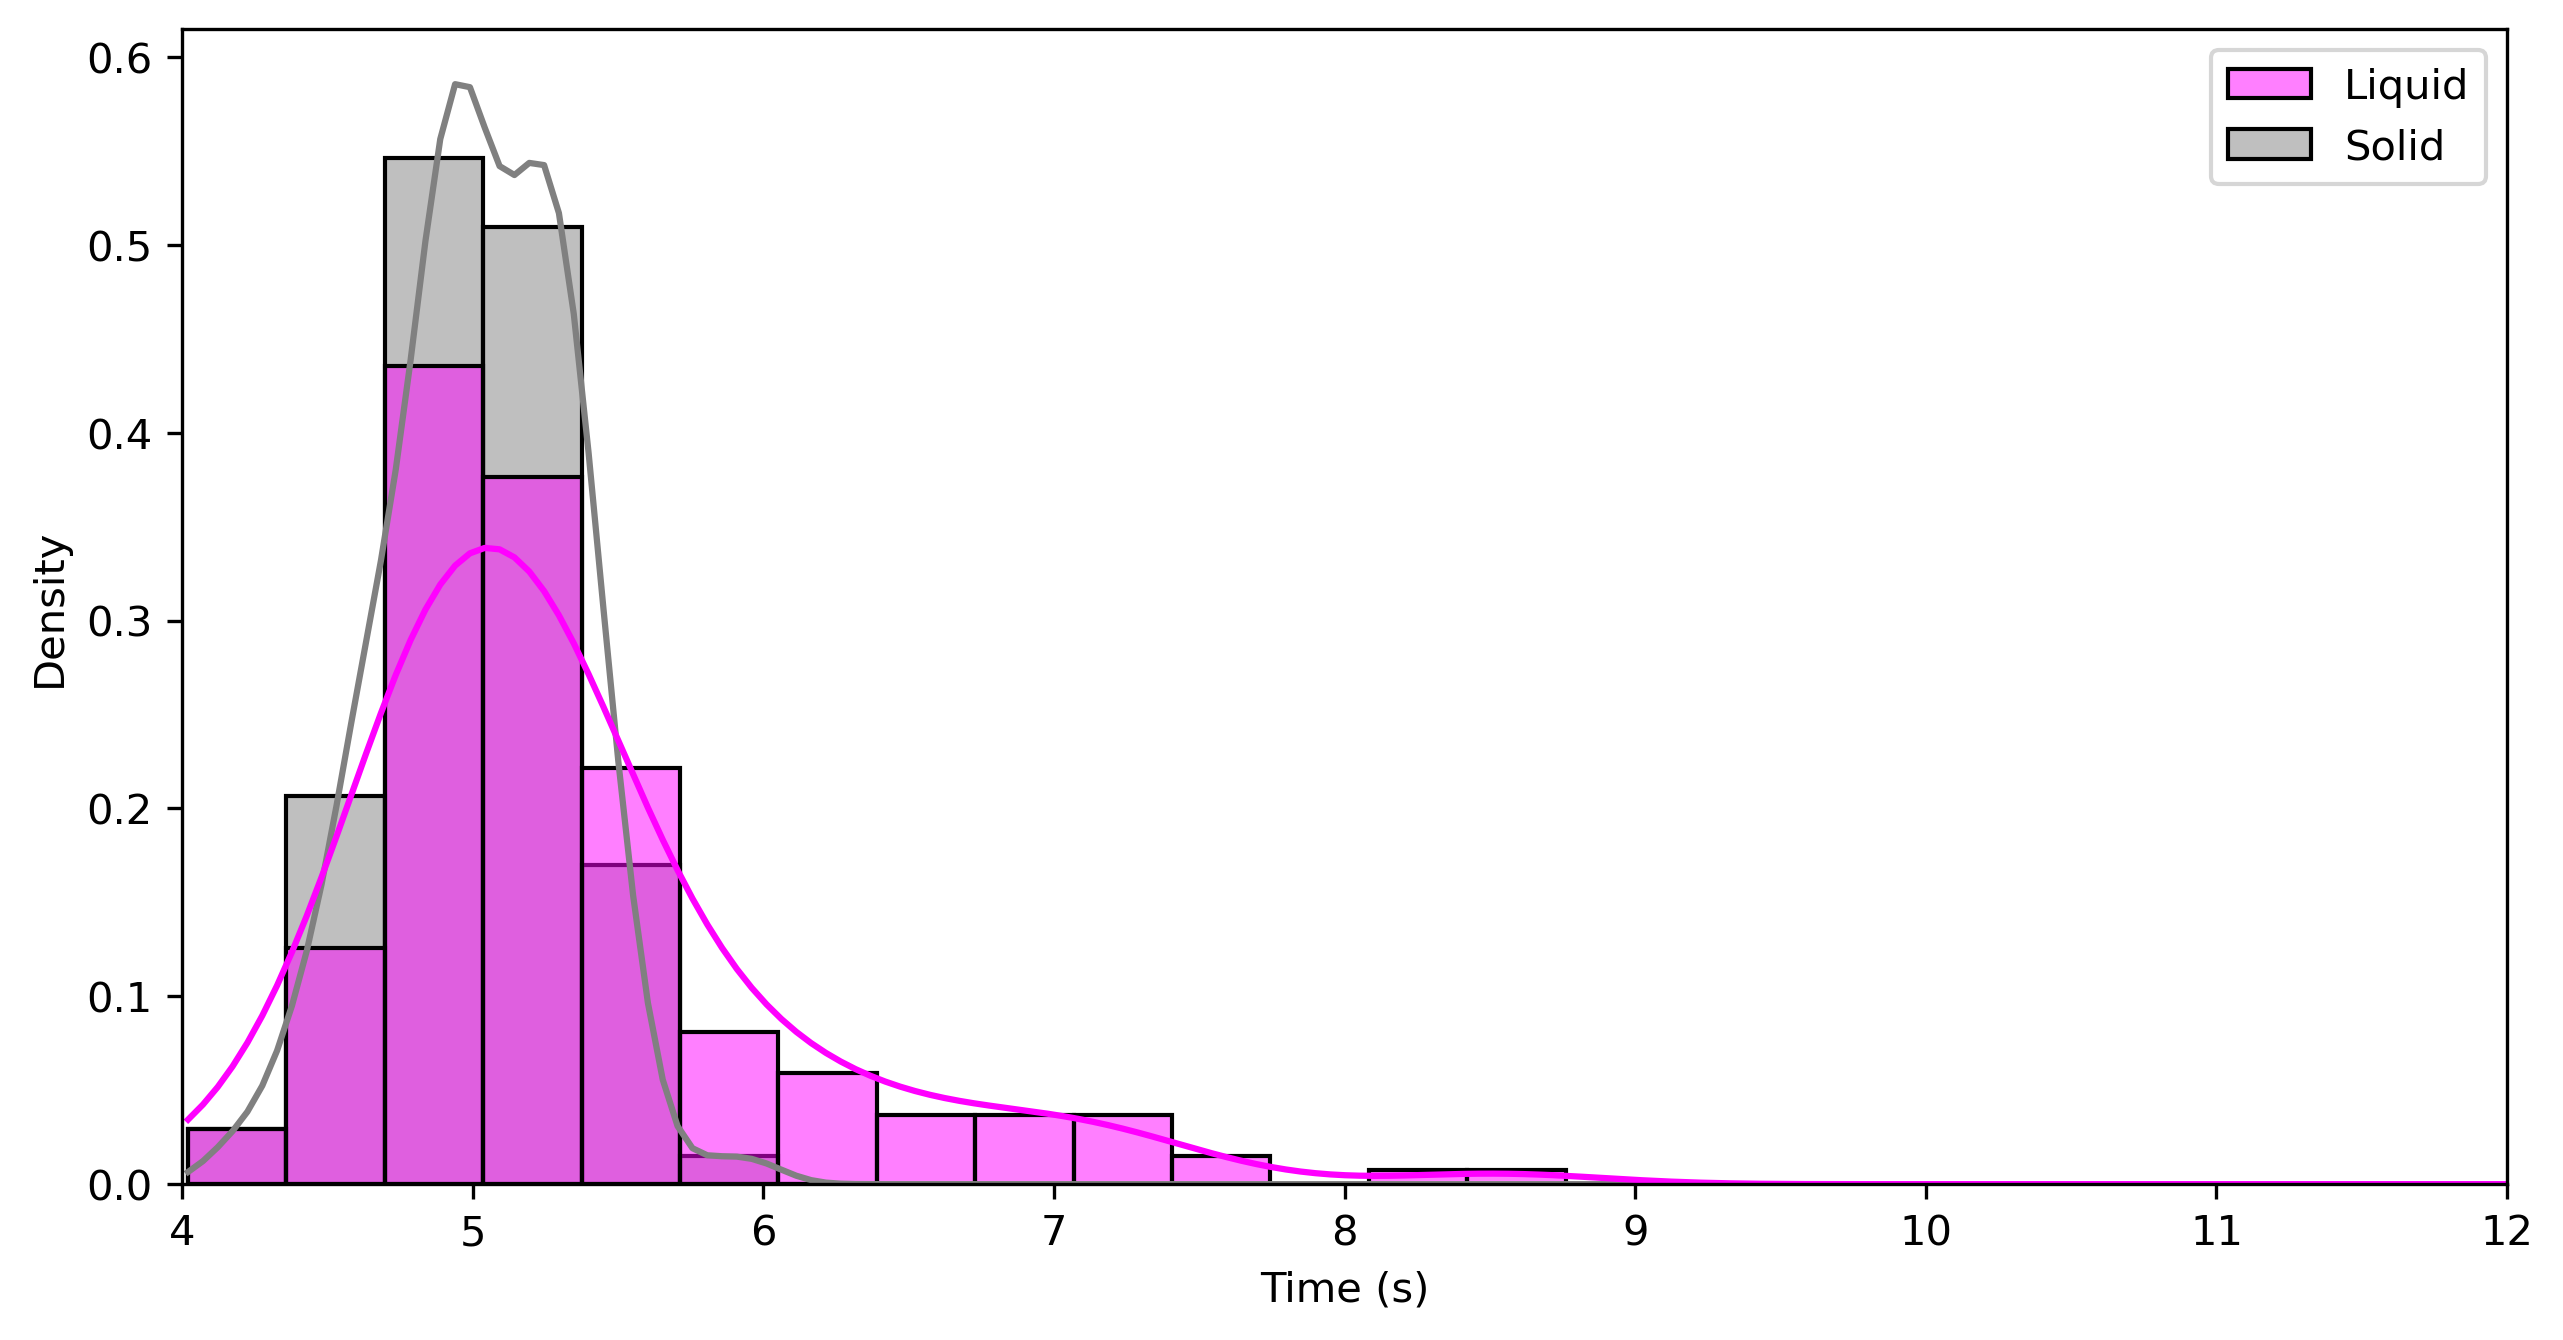

In [35]:
# Normal
df = pd.DataFrame({'Liquid':normal_liquid.total_time,'Solid':normal_solid.total_time})

plt.figure(figsize=(10,5), dpi=300)
sns.histplot(data=df, bins=30, stat='density', kde=True, palette=['magenta','gray'])
plt.xlabel('Time (s)')
plt.xlim((4,12))
plt.show()

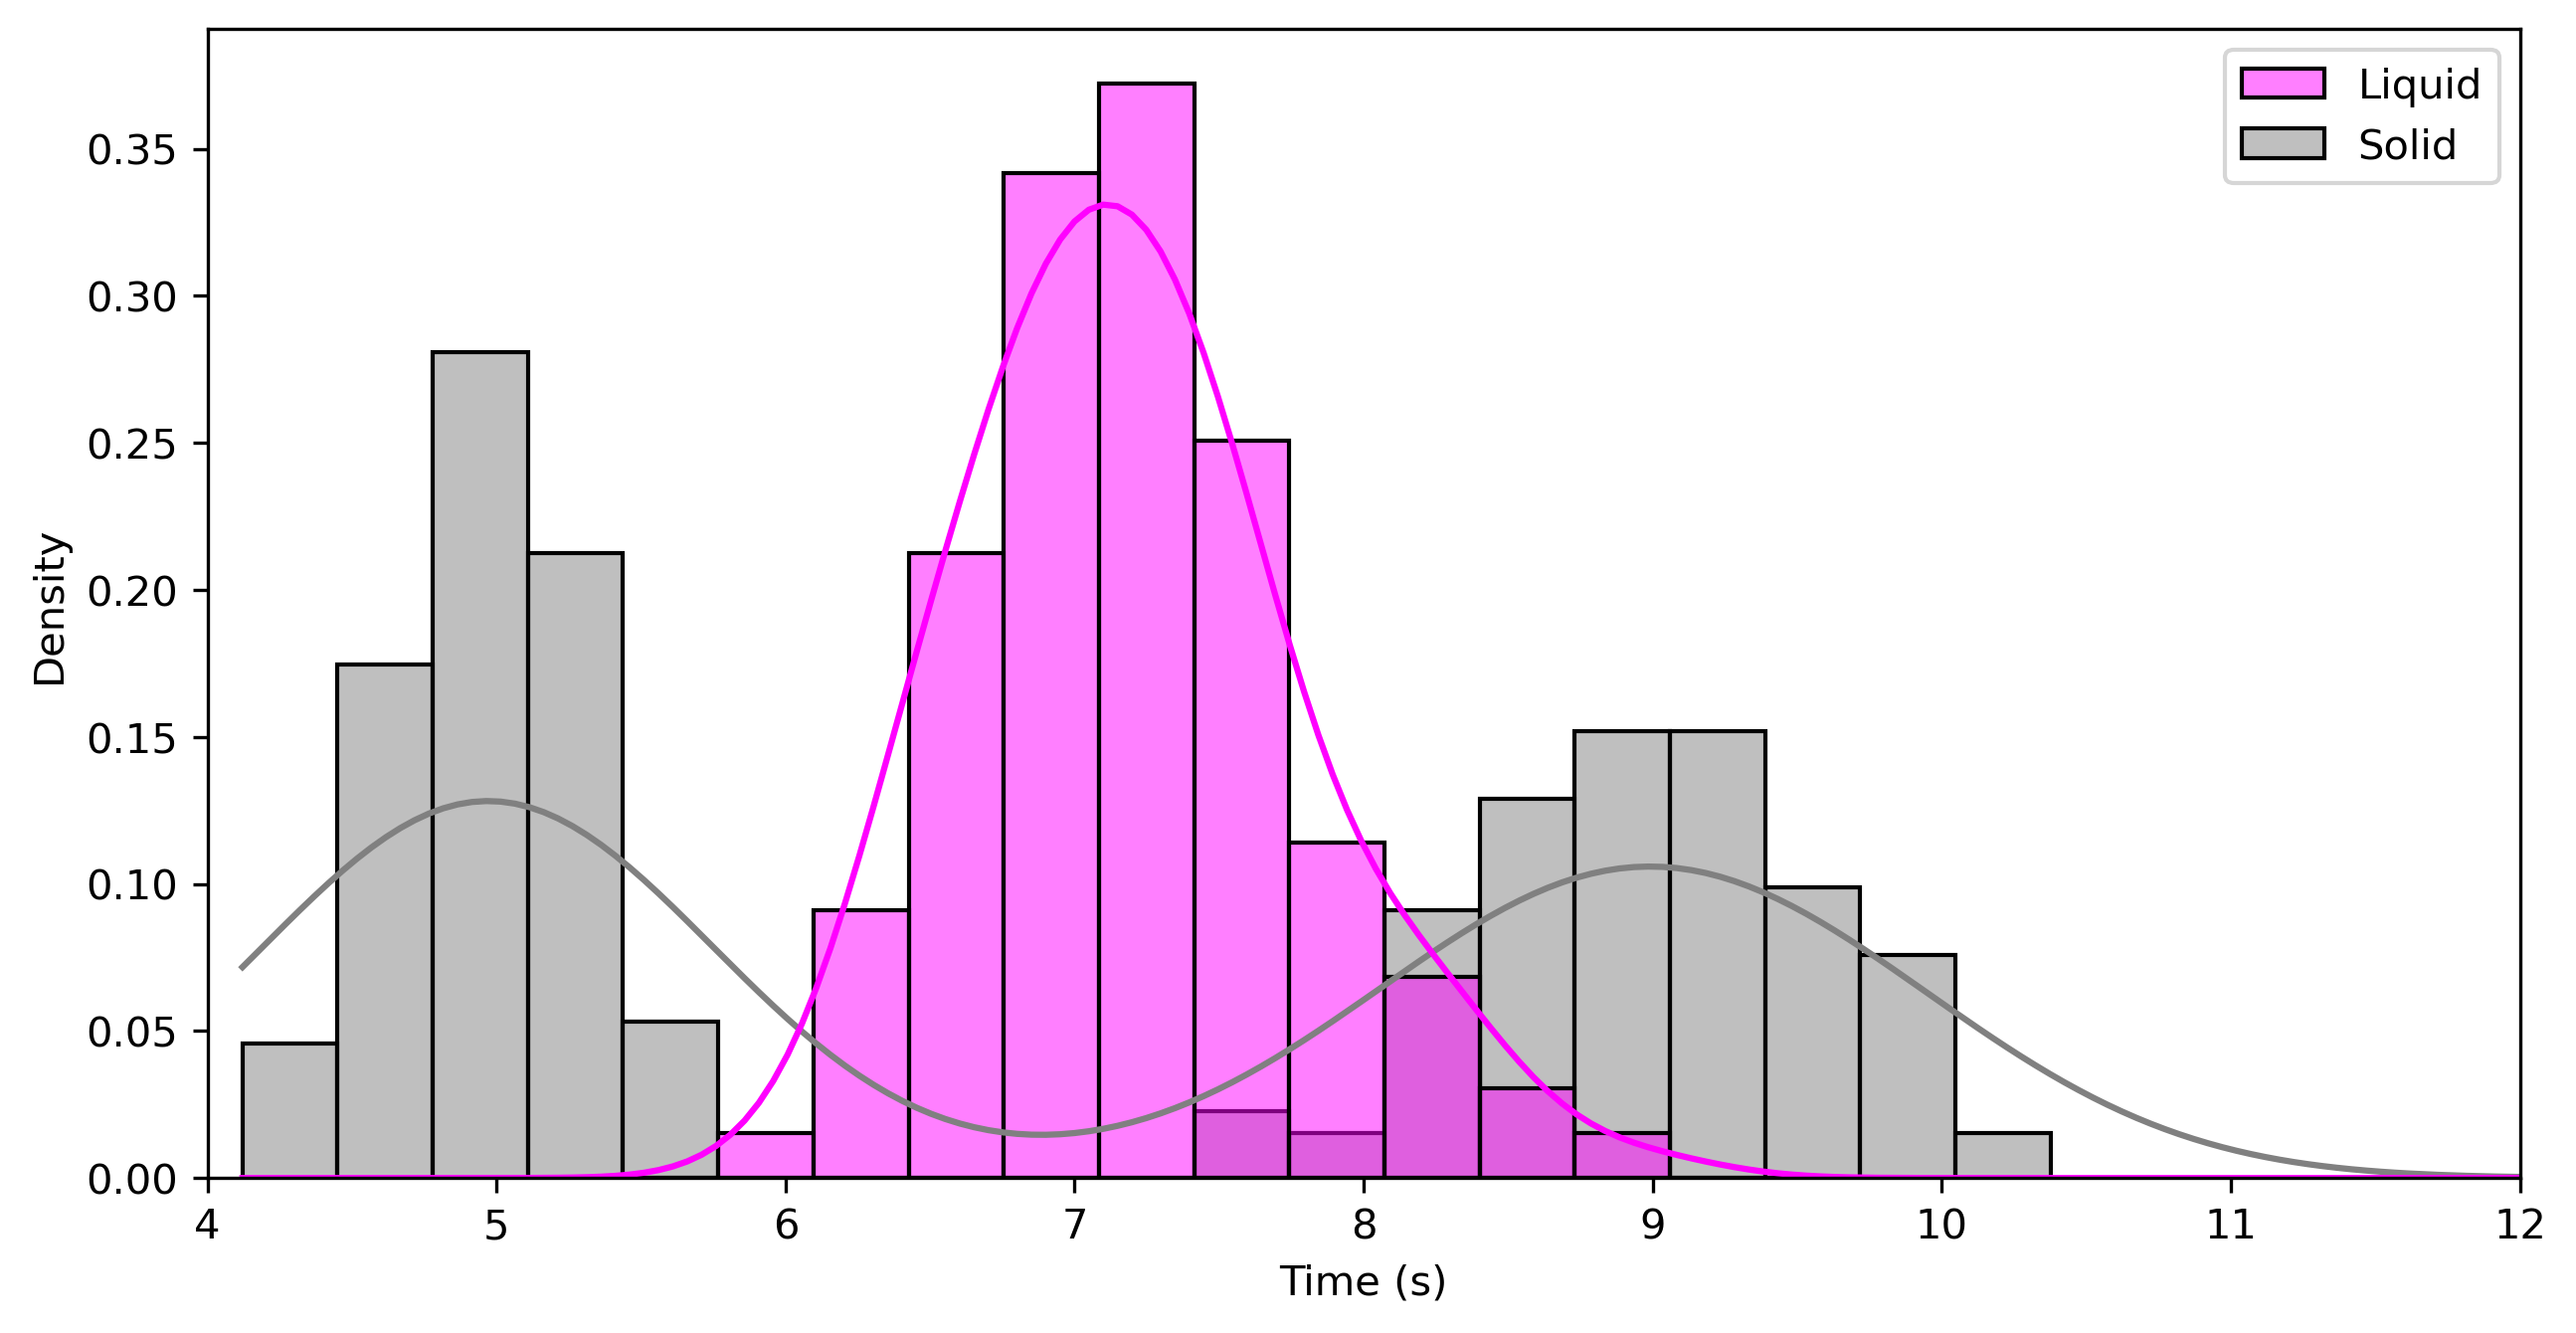

In [36]:
# Anomaly
df = pd.DataFrame({'Liquid':liquid_anomaly.total_time,'Solid':solid_anomaly.total_time})

plt.figure(figsize=(10,5), dpi=300)
sns.histplot(data=df, bins=30, stat='density', kde=True, palette=['magenta','gray'])
plt.xlabel('Time (s)')
plt.xlim((4,12))
plt.show()

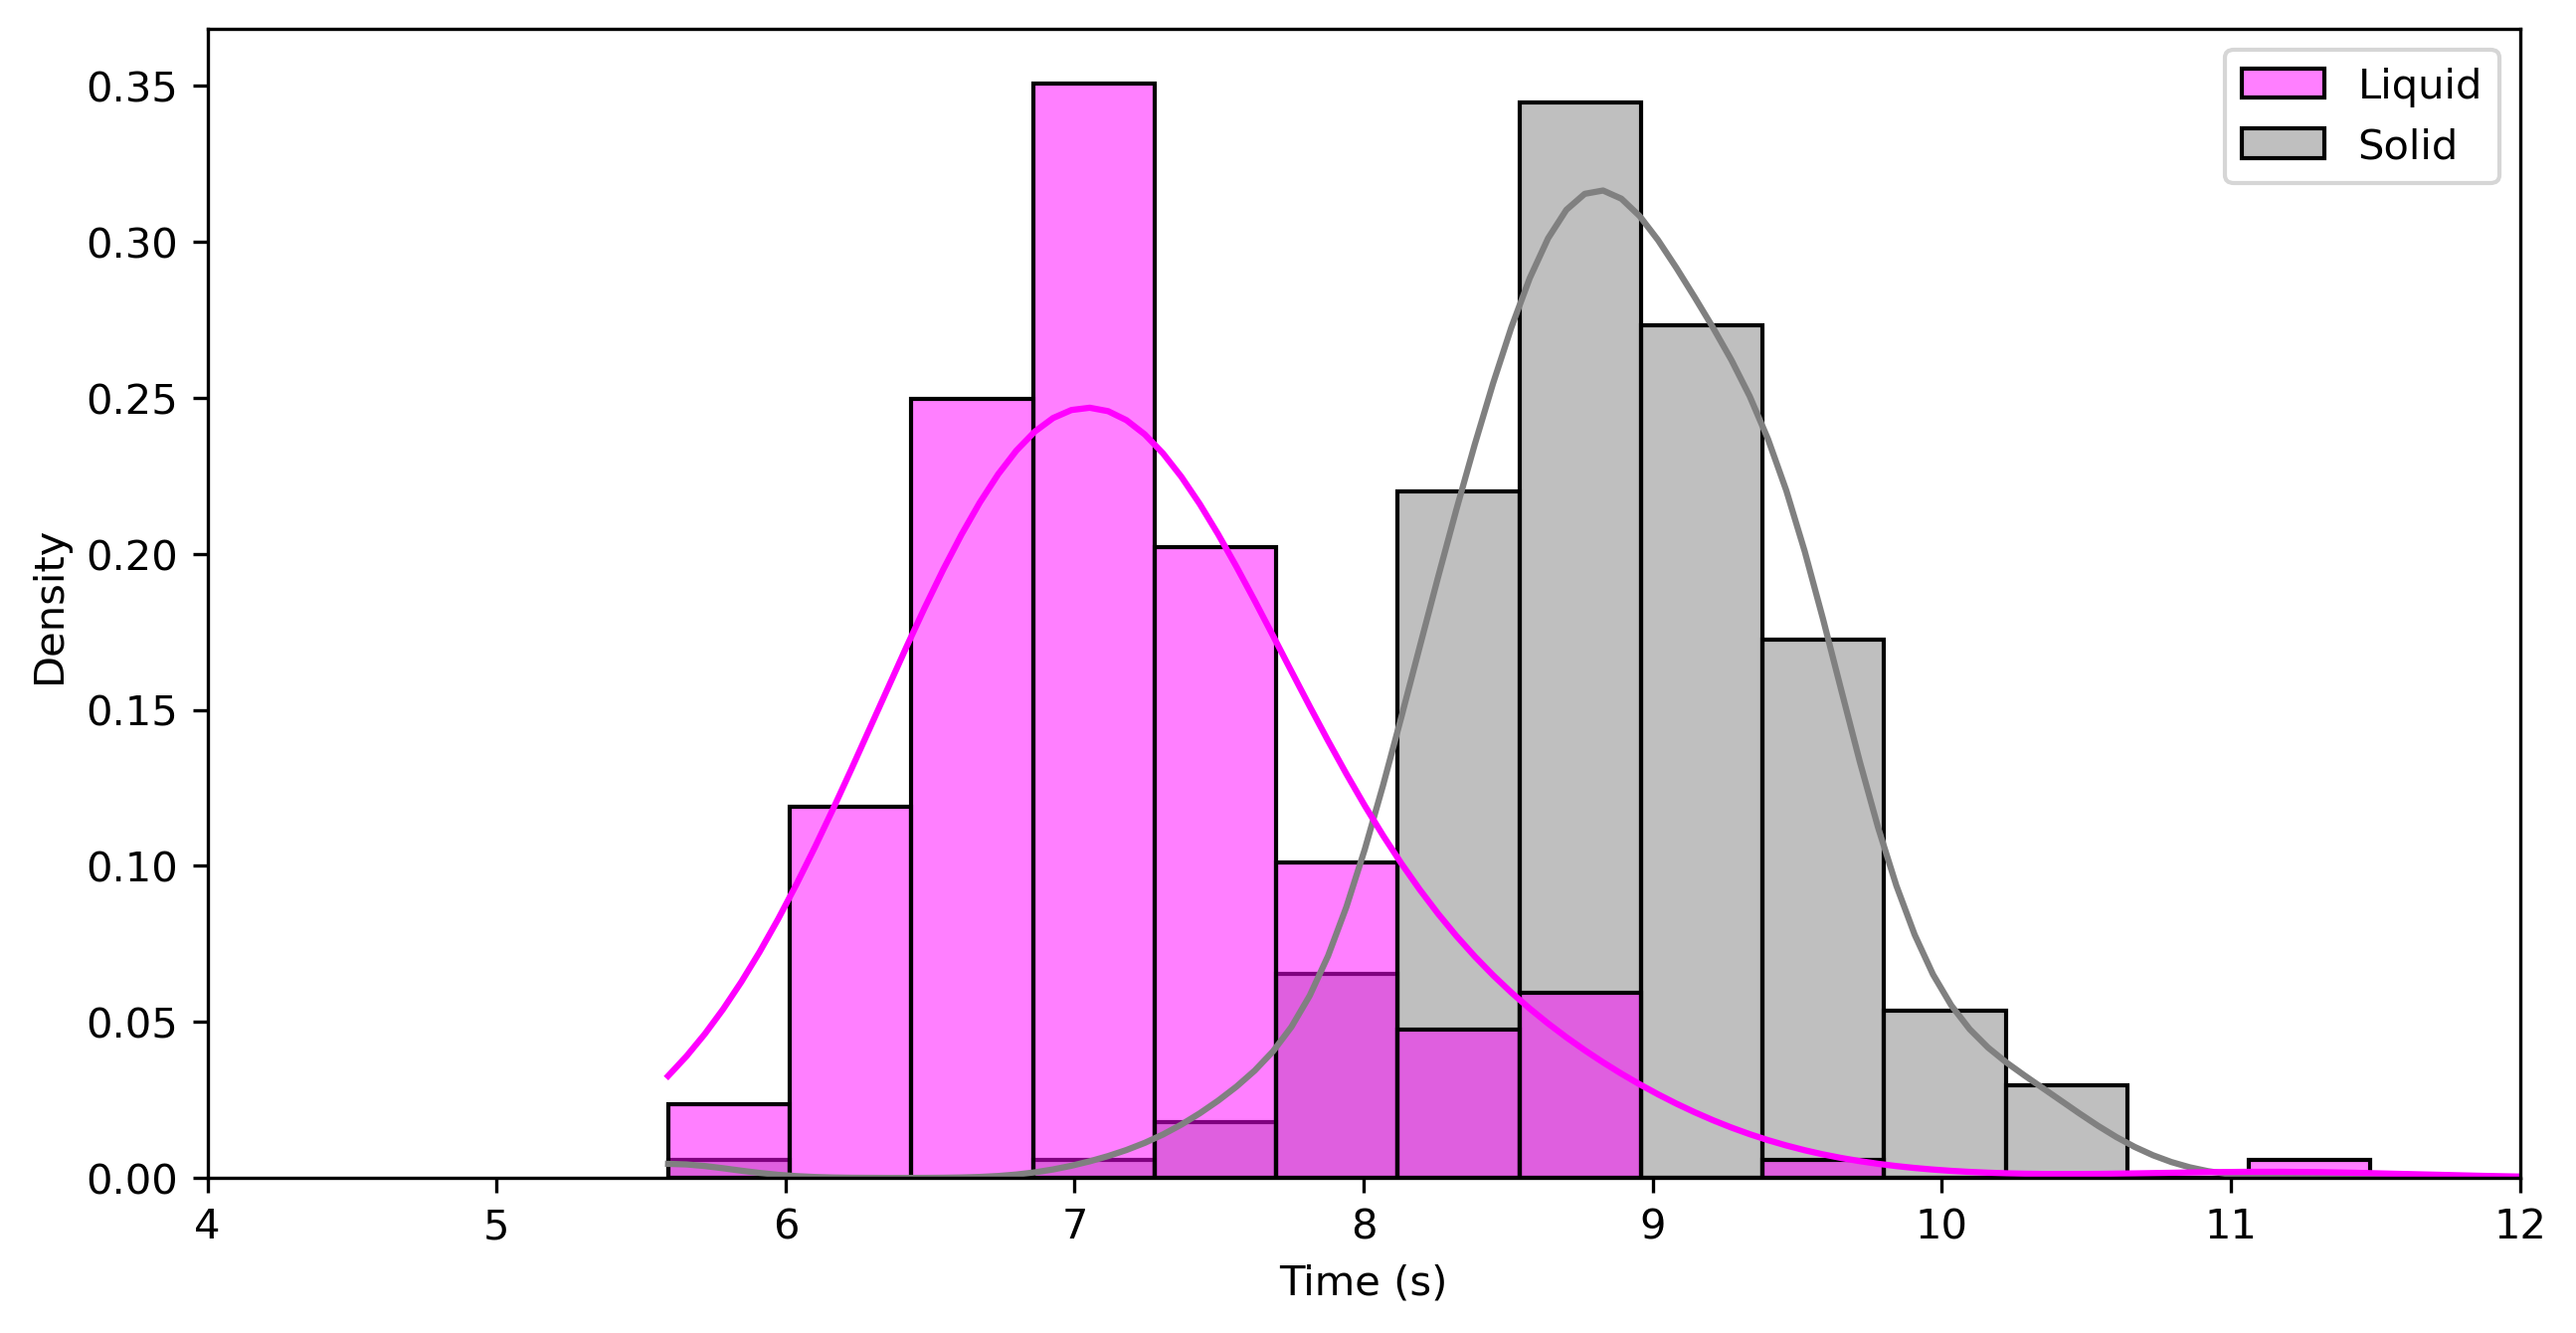

In [37]:
# Perm
df = pd.DataFrame({'Liquid':liquid_perm.total_time,'Solid':solid_perm.total_time})

plt.figure(figsize=(10,5), dpi=300)
sns.histplot(data=df, bins=30, stat='density', kde=True, palette=['magenta','gray'])
plt.xlabel('Time (s)')
plt.xlim((4,12))
plt.show()

In [38]:
print(normal_liquid.gears)
print(normal_solid.gears)

[['NUMBA', 'CYTHON_UNTHREADED', 'NUMBA'], ['NUMBA', 'CYTHON_UNTHREADED', 'OPENCL_1'], ['CYTHON_THREADED_GUIDED', 'CYTHON_UNTHREADED', 'OPENCL_2'], ['OPENCL_2', 'CYTHON_UNTHREADED', 'NUMBA'], ['OPENCL_2', 'CYTHON_UNTHREADED', 'OPENCL_2'], ['OPENCL_2', 'CYTHON_UNTHREADED', 'CYTHON_THREADED'], ['OPENCL_2', 'CYTHON_UNTHREADED', 'CYTHON_UNTHREADED'], ['OPENCL_2', 'CYTHON_UNTHREADED', 'PYTHON'], ['PYTHON', 'CYTHON_UNTHREADED', 'OPENCL_2'], ['OPENCL_2', 'CYTHON_UNTHREADED', 'OPENCL_2'], ['OPENCL_2', 'CYTHON_UNTHREADED', 'CYTHON_THREADED'], ['NUMBA', 'CYTHON_UNTHREADED', 'CYTHON_THREADED_DYNAMIC'], ['OPENCL_2', 'OPENCL_1', 'PYTHON'], ['OPENCL_2', 'CYTHON_UNTHREADED', 'PYTHON'], ['OPENCL_2', 'CYTHON_UNTHREADED', 'OPENCL_1'], ['OPENCL_2', 'OPENCL_1', 'CYTHON_UNTHREADED'], ['CYTHON_THREADED_GUIDED', 'OPENCL_1', 'OPENCL_1'], ['OPENCL_2', 'OPENCL_1', 'OPENCL_1'], ['OPENCL_1', 'CYTHON_UNTHREADED', 'CYTHON_THREADED'], ['OPENCL_1', 'CYTHON_UNTHREADED', 'PYTHON'], ['OPENCL_1', 'CYTHON_UNTHREADED', 'CYT

In [39]:
print(liquid_anomaly.gears)
print(solid_anomaly.gears)

[['PYTHON', 'OPENCL_1', 'OPENCL_1'], ['CYTHON_UNTHREADED', 'OPENCL_1', 'NUMBA'], ['CYTHON_UNTHREADED', 'OPENCL_1', 'CYTHON_UNTHREADED'], ['CYTHON_THREADED', 'OPENCL_1', 'CYTHON_UNTHREADED'], ['CYTHON_UNTHREADED', 'OPENCL_1', 'OPENCL_2'], ['CYTHON_UNTHREADED', 'OPENCL_1', 'CYTHON_THREADED_DYNAMIC'], ['CYTHON_UNTHREADED', 'CYTHON_THREADED_DYNAMIC', 'PYTHON'], ['CYTHON_THREADED', 'CYTHON_THREADED_DYNAMIC', 'CYTHON_UNTHREADED'], ['CYTHON_THREADED', 'OPENCL_1', 'OPENCL_1'], ['CYTHON_UNTHREADED', 'CYTHON_THREADED_DYNAMIC', 'CYTHON_UNTHREADED'], ['CYTHON_THREADED', 'CYTHON_THREADED_DYNAMIC', 'OPENCL_2'], ['CYTHON_THREADED', 'CYTHON_THREADED_DYNAMIC', 'CYTHON_UNTHREADED'], ['CYTHON_THREADED', 'OPENCL_1', 'CYTHON_UNTHREADED'], ['CYTHON_UNTHREADED', 'OPENCL_1', 'CYTHON_UNTHREADED'], ['CYTHON_UNTHREADED', 'OPENCL_1', 'CYTHON_THREADED'], ['CYTHON_THREADED', 'OPENCL_1', 'CYTHON_THREADED'], ['CYTHON_UNTHREADED', 'OPENCL_1', 'CYTHON_UNTHREADED'], ['CYTHON_THREADED', 'CYTHON_THREADED_DYNAMIC', 'OPENCL

In [40]:
print(liquid_perm.gears)
print(solid_perm.gears)

[['PYTHON', 'OPENCL_1', 'NUMBA'], ['NUMBA', 'OPENCL_1', 'CYTHON_THREADED_GUIDED'], ['NUMBA', 'OPENCL_2', 'CYTHON_THREADED'], ['NUMBA', 'OPENCL_2', 'OPENCL_2'], ['CYTHON_THREADED_DYNAMIC', 'OPENCL_2', 'CYTHON_THREADED_DYNAMIC'], ['CYTHON_UNTHREADED', 'OPENCL_2', 'OPENCL_2'], ['CYTHON_THREADED_DYNAMIC', 'OPENCL_2', 'CYTHON_THREADED_DYNAMIC'], ['CYTHON_THREADED_DYNAMIC', 'PYTHON', 'PYTHON'], ['NUMBA', 'OPENCL_2', 'CYTHON_THREADED'], ['NUMBA', 'OPENCL_2', 'NUMBA'], ['PYTHON', 'OPENCL_2', 'OPENCL_2'], ['CYTHON_UNTHREADED', 'PYTHON', 'OPENCL_2'], ['CYTHON_THREADED_DYNAMIC', 'CYTHON_THREADED_GUIDED', 'OPENCL_2'], ['CYTHON_UNTHREADED', 'CYTHON_THREADED_GUIDED', 'CYTHON_THREADED_DYNAMIC'], ['NUMBA', 'CYTHON_THREADED_GUIDED', 'CYTHON_UNTHREADED'], ['CYTHON_UNTHREADED', 'CYTHON_THREADED_GUIDED', 'CYTHON_THREADED_DYNAMIC'], ['NUMBA', 'CYTHON_THREADED_GUIDED', 'OPENCL_2'], ['NUMBA', 'CYTHON_THREADED_GUIDED', 'CYTHON_UNTHREADED'], ['CYTHON_UNTHREADED', 'CYTHON_THREADED_GUIDED', 'NUMBA'], ['NUMBA', '